In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns

In [8]:
filepath = r"D:\CONTRATOS 2024\LEANDRO DOCUMENTOS\LEANDRO DOCUMENTOS\UNIVERSIDAD\SEXTO SEMESTRE\ANALISIS DE DATOS\TAREA 3\2 REGRESION LOGISTICA\heart_cleveland_upload.csv"
data = pd.read_csv(filepath)

In [9]:
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  


In [10]:
print(data.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    2.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    2.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    3.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    1.055556    0.602694    0.676768   
std      0.994914   22.9415

In [11]:
print(data.isnull().sum())

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


In [12]:
# Separar las características y la etiqueta
X = data.drop('condition', axis=1)  # Usa todas las columnas excepto 'condition'
y = data['condition']  # 'condition' es nuestra etiqueta

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 20% de los datos se usarán para prueba

In [14]:
# Es buena práctica escalar las características para la regresión logística
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Ahora estamos listos para entrenar el modelo
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [17]:
# Hacer predicciones con el conjunto de prueba
y_pred = model.predict(X_test_scaled)

In [18]:
# Evaluar el modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[23  9]
 [ 7 21]]
              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



In [19]:
# Si quieres, también puedes obtener la precisión directamente
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7333333333333333


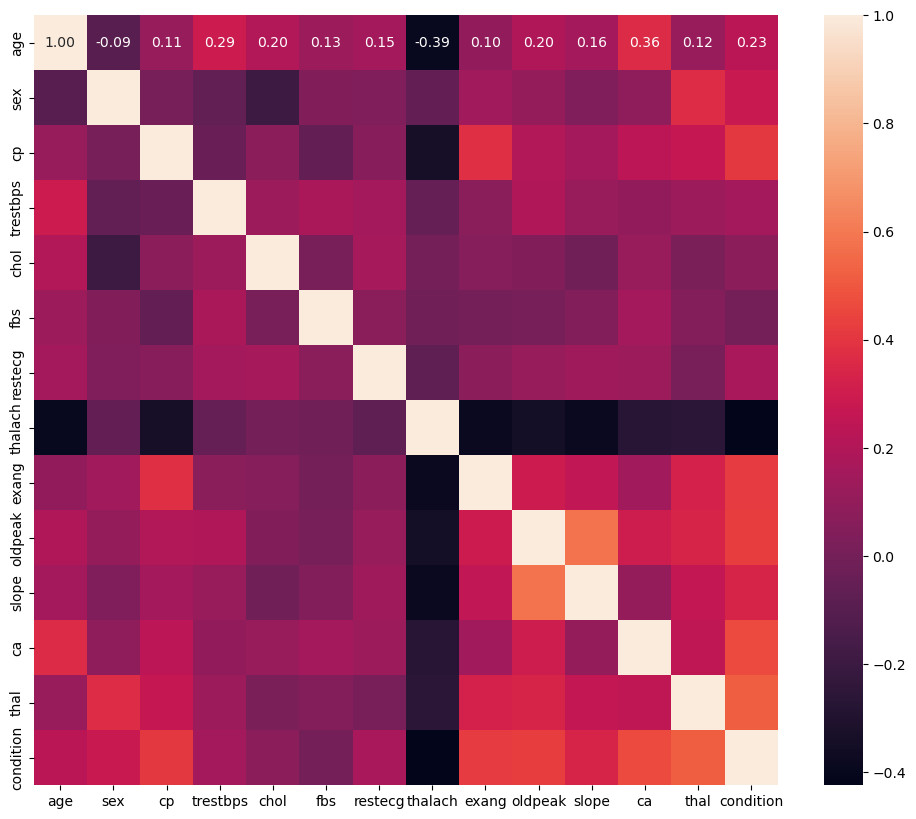

In [24]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()

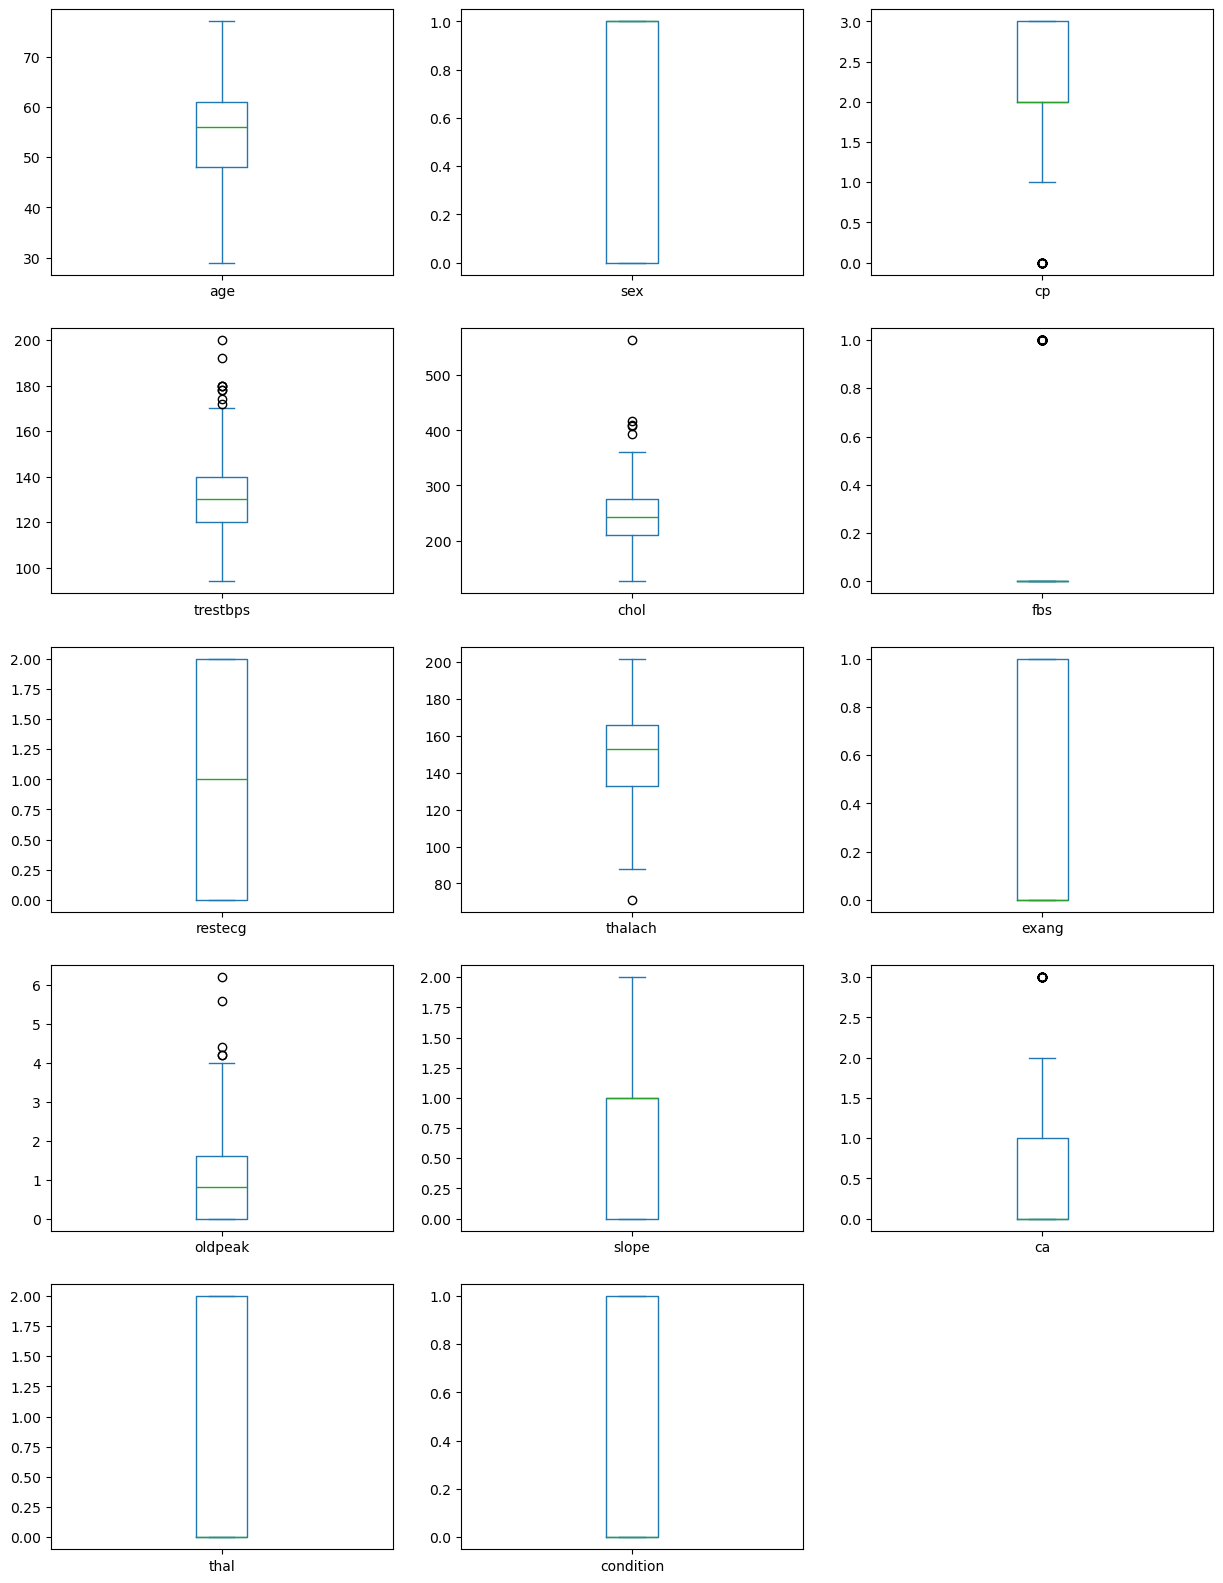

In [25]:
data.plot(kind='box', subplots=True, layout=(5,3), figsize=(15,20))
plt.show()

In [26]:
from sklearn.feature_selection import SelectKBest, f_classif

# Aplicar selección de características
selector = SelectKBest(score_func=f_classif, k='all')
X_new = selector.fit_transform(X, y)

# Obtener las puntuaciones de las características
features_scores = selector.scores_
features_importance = pd.DataFrame({'Feature': X.columns, 'Importance': features_scores})
print(features_importance.sort_values(by='Importance', ascending=False))

     Feature  Importance
12      thal  109.629171
11        ca   80.577866
9    oldpeak   64.677208
7    thalach   64.589855
8      exang   63.680253
2         cp   59.241915
10     slope   36.804300
1        sex   24.798347
0        age   16.038097
6    restecg    8.394987
3   trestbps    7.117646
4       chol    1.913800
5        fbs    0.002959


In [27]:
from sklearn.model_selection import GridSearchCV

# Configuración de parámetros a probar
param_grid = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'saga']}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

# Mejor modelo encontrado
best_model = grid.best_estimator_

In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluación con el conjunto de prueba
y_pred = best_model.predict(X_test_scaled)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision}\nRecall: {recall}\nF1-Score: {f1}')

Precision: 0.6875
Recall: 0.7857142857142857
F1-Score: 0.7333333333333334


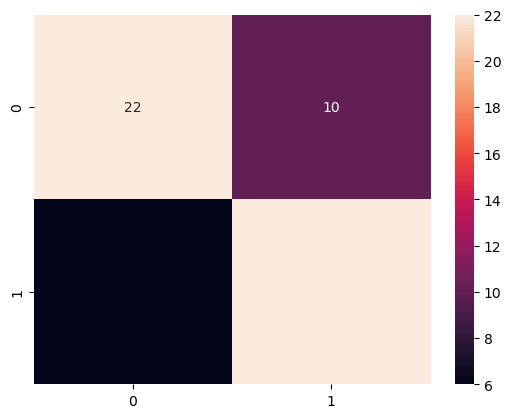

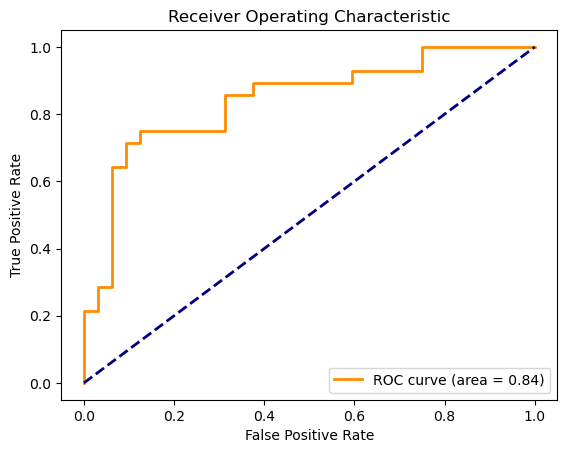

In [29]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, best_model.decision_function(X_test_scaled))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()